<a href="https://colab.research.google.com/github/DataAnalysis-python/soccer-FIFA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%9D%B4%EC%A0%81%EB%A3%8C%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

201904073 윤선미 
20190     김희성

목차 
1. 서론
  제안배경
  목적
  가설
2. 데이터 전처리
3. 데이터 분석
4, 데이터 시각화
5. 결론



1. 서론

이적료(Transfer Fee)

계약기간이 6개월 이상 남아 있는 프로선수가 소속된 팀과의 계약이 만료되지 않는 상황에서 다른 팀으로 옮기고자 할 때 선수를 영입하려는 새로운 구단이 원 소속구단에게 지급하는 비용

팀 내에서 부족한 팀 영입 이외에 티켓 판매부터 유니폼 판매, TV 중계료 및 광고료 등 선수  이적료 그 이상의 수입이 보장되기 때문에 구단의 비즈니스에 중요한 역할이 된다. 

목적 

데이터를 분석하여 이적료와 선수들의 간의 관계를 측정한다. 

가설 
1.  선수의 현재 능력치가 가장 영향을 많이 미칠 것이다. 
2. 선수의 계약 기간이 많이 남을 수록 더 많은 이적료가 요구될 것 이다. 


## **2. 데이터 전처리**


---
###2.1 데이터프레임 데이터




In [63]:
import pandas as pd
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
train= pd.read_csv('/content/drive/MyDrive/데이콘/FIFA_train.csv')
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


> FIFA_train.csv의 데이터 정보<br>
<br>
age: 나이
stat_overall : 선수의 현재 능력치 <br> 
stat_potential : 선수의 발전 가능성<br> 
value : 이적료<br> 
 continent : 선수의 국적<br> 
  contract_until : 선수의 계약 기간<br> 
   position : 선수의 포지션<br> 
                      prefer_foot : 선수의 주 발<br> 
                       reputation : 선수의 유명도<br> 
                        stat_skill_moves : 선수의 개인 능력<br> 


In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [67]:
train.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03
mean,7966.775750,25.209136,1.130878,67.091133,71.997201,2.401702,2.778673e+06
std,4844.428521,4.635515,0.423792,6.854910,5.988147,0.776048,5.840982e+06
min,0.000000,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,3751.750000,21.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,7696.500000,25.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,12082.250000,28.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,16948.000000,40.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


###2.2 데이터 전처리

In [68]:
##결측치 확인

train.isnull().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

In [69]:
# 컬럼의 고유값 개수를 확인 

for col in train.columns:
  n_unique=len(train[col].unique())
  print(col,n_unique)

id 8932
name 8932
age 25
continent 5
contract_until 17
position 4
prefer_foot 2
reputation 5
stat_overall 46
stat_potential 45
stat_skill_moves 5
value 198


In [70]:
 # 필요없는 데이터 삭제
 
train.drop(['id','name'],axis=1,inplace=True)

In [71]:
# 계약기간 컬럼의 고유한 값 빈도
train.contract_until.value_counts()

2019            2366
2021            2308
2020            2041
2022             761
2023             506
Jun 30, 2019     501
2018             327
Dec 31, 2018      64
May 31, 2019      19
2024              12
Jan 31, 2019      10
Jun 30, 2020       9
2025               3
Jan 1, 2019        2
2026               1
May 31, 2020       1
Jan 12, 2019       1
Name: contract_until, dtype: int64

In [72]:
# 계약기간의 기간을 yyyy로 고정

def func(string: str) -> int:
    string = str(string)[-4:]
    return int(string)

train['contract_until'] = train['contract_until'].apply(func)
train['contract_until'].value_counts()

2019    2899
2021    2308
2020    2051
2022     761
2023     506
2018     391
2024      12
2025       3
2026       1
Name: contract_until, dtype: int64

In [73]:
#2024,2025,2026년도 데이터의 경우 전체 데이터 건수에 비해 값이 적음으로 분석 대상에서 제외

list=[2024,2025,2026]
train=train.loc[~train['contract_until'].isin(list)]

train['contract_until'].unique()


array([2021, 2020, 2019, 2023, 2022, 2018])

In [85]:
train['value'].unique()

array([1.105e+08, 7.200e+07, 8.000e+07, 5.100e+07, 6.800e+07, 4.400e+07,
       6.000e+07, 6.300e+07, 5.800e+07, 5.150e+07, 3.800e+07, 2.700e+07,
       6.950e+07, 5.950e+07, 6.200e+07, 7.350e+07, 5.900e+07, 4.600e+07,
       3.600e+07, 5.700e+07, 4.000e+06, 6.400e+07, 6.250e+07, 4.500e+07,
       4.650e+07, 3.400e+07, 5.200e+07, 4.450e+07, 5.500e+07, 3.650e+07,
       4.550e+07, 4.350e+07, 3.000e+07, 1.800e+07, 2.150e+07, 5.050e+07,
       5.400e+07, 2.850e+07, 3.200e+07, 3.750e+07, 3.900e+07, 2.600e+07,
       3.300e+07, 3.850e+07, 9.000e+06, 3.700e+07, 2.200e+07, 1.400e+07,
       4.050e+07, 3.550e+07, 3.150e+07, 4.200e+07, 2.500e+07, 2.950e+07,
       2.400e+07, 3.100e+07, 2.750e+07, 3.050e+07, 2.900e+07, 1.650e+07,
       1.900e+07, 1.550e+07, 4.000e+07, 4.100e+07, 2.800e+07, 3.450e+07,
       3.250e+07, 2.000e+07, 3.500e+07, 2.450e+07, 2.650e+07, 2.100e+07,
       2.550e+07, 1.750e+07, 1.300e+07, 8.000e+06, 6.000e+06, 1.950e+07,
       2.250e+07, 1.850e+07, 2.350e+07, 1.700e+07, 

In [74]:
#  데이터의 스케일을 조정하기 위해 value에 대해 자연로그를 취한 log_value 컬럼을 추가

train["log_value"]=(np.log(train["value"])).apply(lambda x : int(x))

train["log_value"].unique()

array([18, 17, 15, 16, 14, 13, 12, 11, 10,  9])

In [76]:
#범주형 데이터를 카테고리형으로 형변환

train['continent']=train['continent'].astype('category')
train['position'] = train['position'].astype('category')
train['prefer_foot'] = train['prefer_foot'].astype('category')
train['reputation']=train['reputation'].astype('category')
train['log_value']=train['log_value'].astype('category')

In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8916 entries, 0 to 8931
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               8916 non-null   int64   
 1   continent         8916 non-null   category
 2   contract_until    8916 non-null   int64   
 3   position          8916 non-null   category
 4   prefer_foot       8916 non-null   category
 5   reputation        8916 non-null   category
 6   stat_overall      8916 non-null   int64   
 7   stat_potential    8916 non-null   int64   
 8   stat_skill_moves  8916 non-null   float64 
 9   value             8916 non-null   float64 
 10  log_value         8916 non-null   category
dtypes: category(5), float64(2), int64(4)
memory usage: 790.3 KB


##**3. 데이터 분석**

### 3.1이적료의 분석

[Text(0.5, 1.0, 'log_value boxplot')]

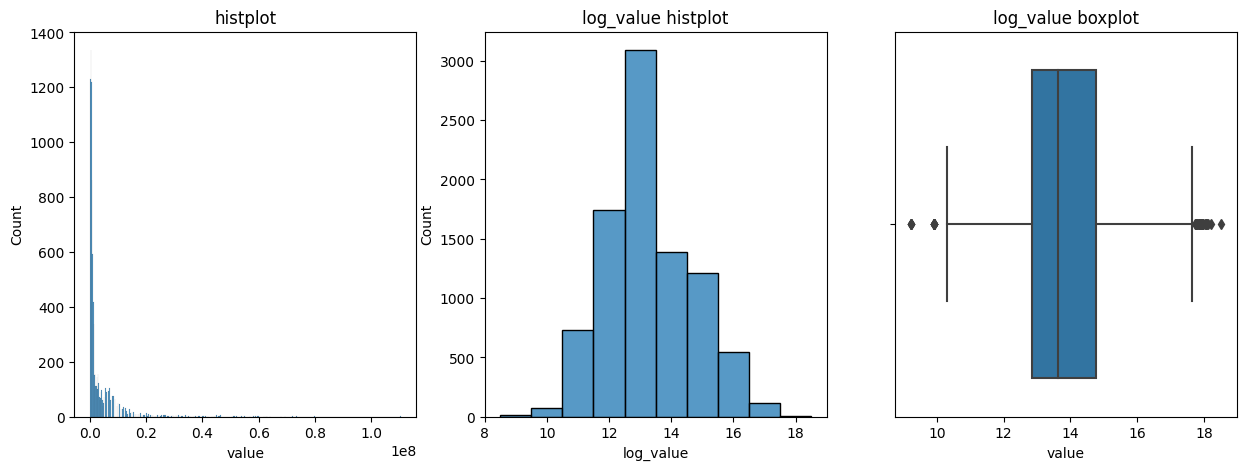

In [77]:
f , axes = plt.subplots(1,3)
axes = axes.flatten()
f.set_size_inches(15,5)

# value 데이터 분포도
sns.histplot(x="value", data=train, ax=axes[0])
axes[0].set(title = "histplot")

#log_value 데이터 분포도
sns.histplot(x="log_value", data=train, ax=axes[1])
axes[1].set(title = "log_value histplot")

# log_value 데이터 이상치 확인
sns.boxplot(x=np.log(train["value"]), data=train, ax=axes[2])
axes[2].set(title = "log_value boxplot")



value값의 여러가지 형태로 시각화<br>
-> 이적료간의 편차가 있음, log_value값이 13인 값이 제일 많이 존재함

### 3.2 인기도와 현재 능력관계에 대한 선수의 가치

In [88]:
key=train.groupby('reputation').groups.keys()

color=['limegreen','violet','dodgerblue','orange','red']


def flatten_cols (title,col):
  fig, axs = plt.subplots( ncols=int(len(key)), 
  figsize=(20,8),gridspec_kw={'wspace': .5})
  fig.suptitle(title, size=15)
  for i,y in enumerate(key):
    ax = axs[i]
    ax.set_title('reputation: '+str(y))
    ax.grid(True)
    ax.axis([50, 100, -50000000, 150000000])
    select_rep=train[train['reputation']==y]
    sns.regplot(x=col, y='value',color=color[i],
    data=select_rep, ax=ax)
  


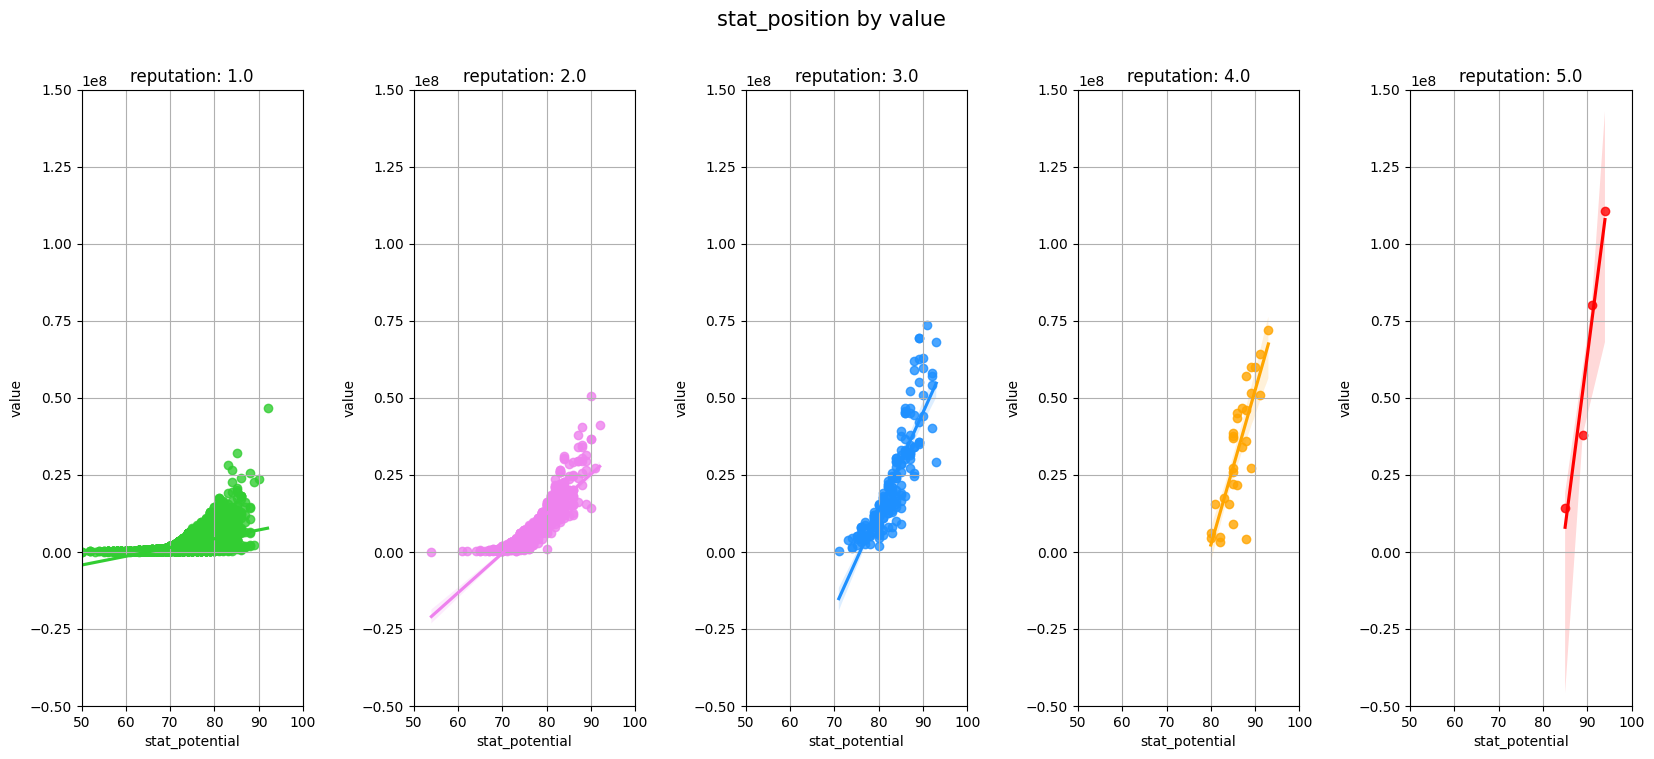

In [92]:
flatten_cols('stat_position by value','stat_potential')

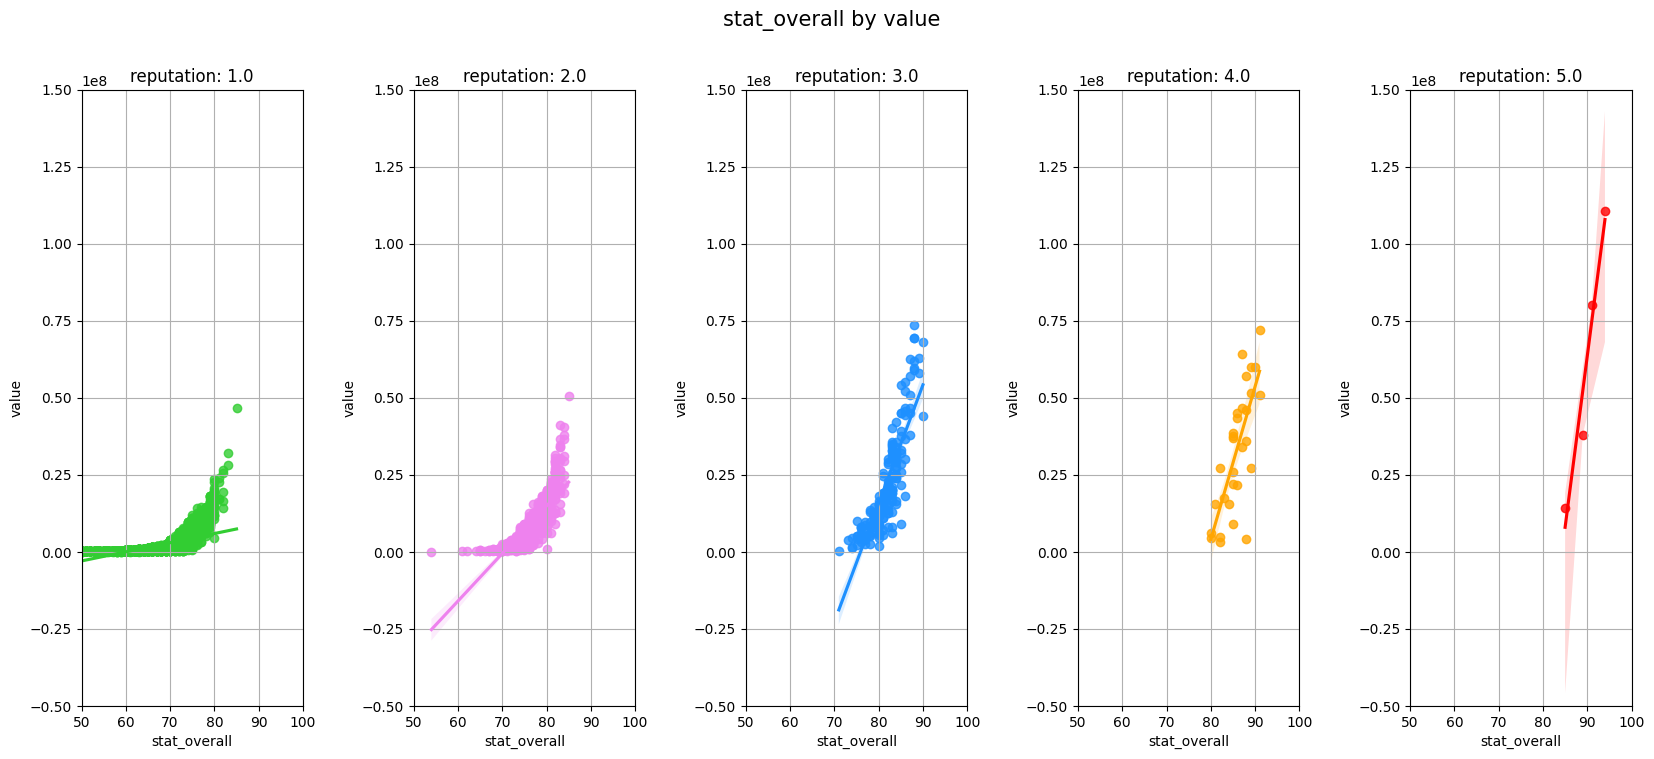

In [93]:
flatten_cols('stat_overall by value','stat_overall')

reputation 인기등급별 현재 능력치를 나누어 보았을 때 높은 등급일 수록 좀더 가치있는 평가를 받았고 낮은 등급 일 수록 좁 더 

<Axes: title={'center': 'contract_untill per value'}, xlabel='contract_until'>

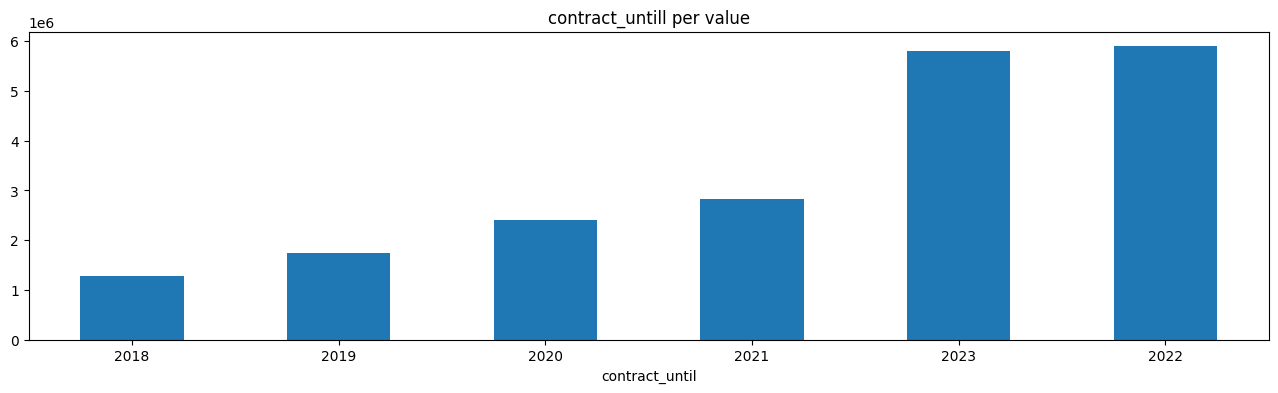

In [80]:
#계약연도를 기준으로 이적료의 평균을 반환
fig, ax = plt.subplots(figsize=(16,4))
(
train.groupby('contract_until')['value']
.agg(['mean','count'])
.sort_values('mean')
.plot.bar(y='mean',rot=0,legend=False,ax=ax,
          title='contract_untill per value')

)

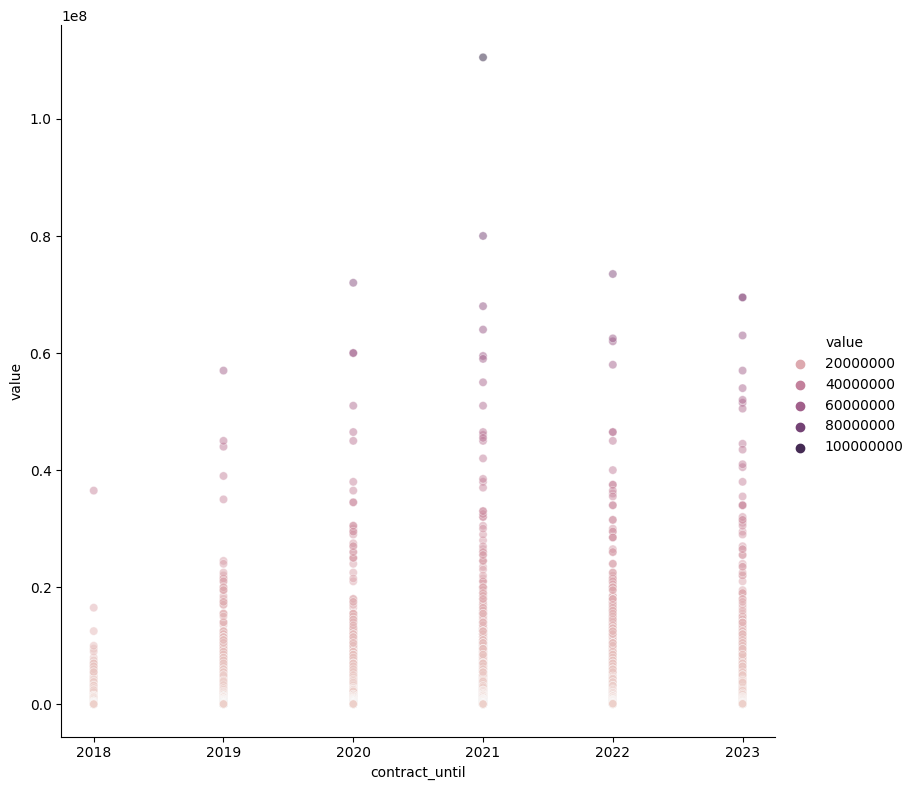

In [81]:
#그룹별 평균 이적률은 23년이 가장 높지만 가장 높은 이적률을 찍고 있는 사람은 
sns.relplot(
    x='contract_until',
    y='value',
    data=train,
    hue='value',
    alpha=.5,
    height=8
)


In [82]:
#이적료가 높은 선수들의 
col=['stat_overall','stat_potential','stat_skill_moves','reputation','value']
train[col].sort_values('value', ascending=False).head(100)

,stat_overall,stat_potential,stat_skill_moves,reputation,value
0,94,94,4.0,5.0,110500000.0
2,91,91,3.0,5.0,80000000.0
17,88,91,4.0,3.0,73500000.0
1,91,93,1.0,4.0,72000000.0
18,88,89,5.0,3.0,69500000.0
...,...,...,...,...,...
79,84,87,1.0,3.0,27000000.0
172,82,85,4.0,4.0,27000000.0
140,82,91,2.0,2.0,27000000.0
13,89,89,2.0,4.0,27000000.0


In [ ]:
#이적료를 기준으로 다른 값들 평균 내리기 

higer=(train['value'])

In [83]:
train.corr().style.background_gradient(cmap='Blues_r')
# 이적료가 높은 선수들을 레이더 차트로 나타내기 연관관계가 강한 컬럼과의

<ipython-input-83-4666ed1dd7fa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr().style.background_gradient(cmap='Blues_r')


,age,contract_until,stat_overall,stat_potential,stat_skill_moves,value
age,1.000000,-0.129047,0.471002,-0.229959,0.041103,0.092290
contract_until,-0.129047,1.000000,0.149115,0.248625,0.078431,0.212758
stat_overall,0.471002,0.149115,1.000000,0.662961,0.400152,0.657019
stat_potential,-0.229959,0.248625,0.662961,1.000000,0.331386,0.607918
stat_skill_moves,0.041103,0.078431,0.400152,0.331386,1.000000,0.300817
value,0.092290,0.212758,0.657019,0.607918,0.300817,1.000000


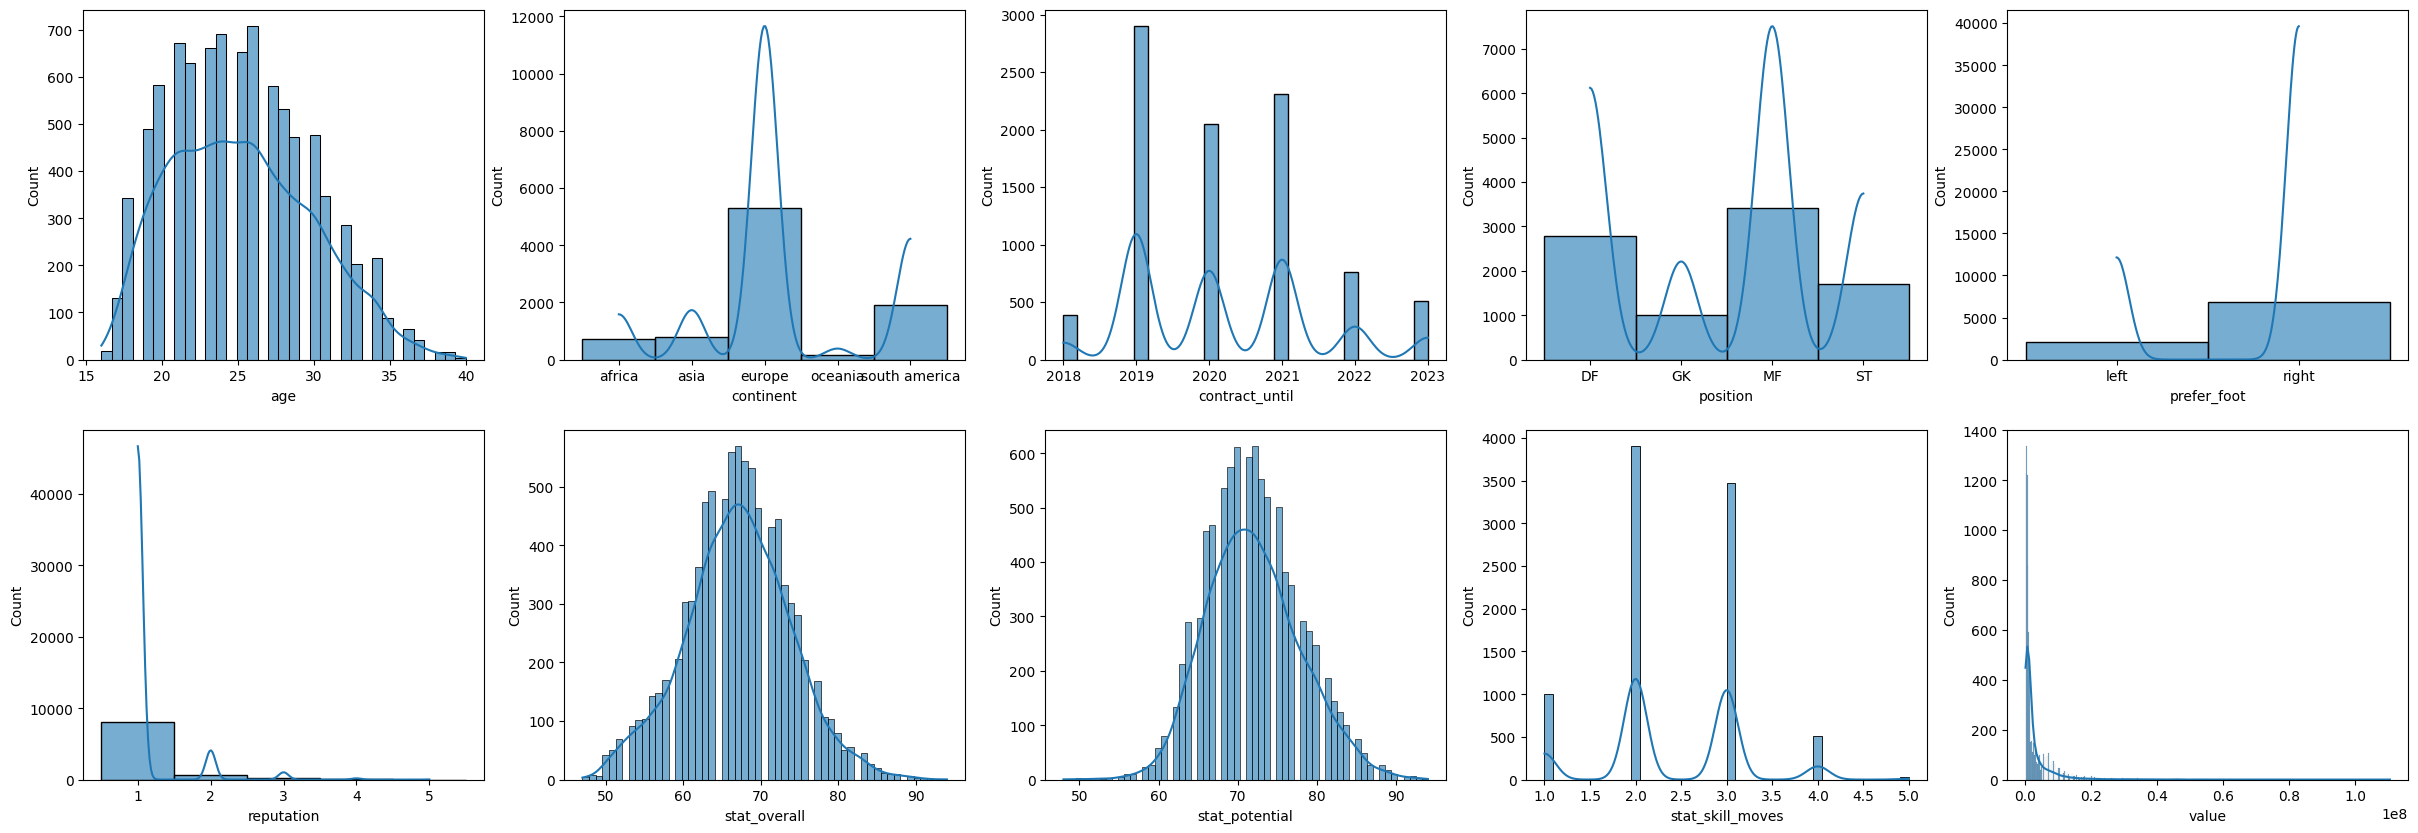

In [84]:
# 데이터 세트 시각화

X=train
y = train['value']

f, axes = plt.subplots(2,5, figsize=(30,10)) 
axes = axes.flatten()
for col,ax in zip(X.columns, axes):
    sns.histplot(data = X, x=col, ax=ax, alpha=0.6, kde=True)
plt.show()